In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [36]:
df_garbage = pd.read_csv("../data/preprocessed/cleaned_data_v3.csv")
df_weather = pd.read_csv("../data/preprocessed/weather_data.csv", sep=";")

In [37]:
df_garbage.head()

,id,container_id,messungszähler,height_in_cm,temperatur_in_grad,tilt_in_grad,niederschlag_in_mm,height_delta,height_increase,laengengrad,...,DEVEUI_70B3D50070001780,DEVEUI_70B3D50070001781,DEVEUI_70B3D50070001782,DEVEUI_70B3D50070001786,DEVEUI_70B3D50070001787,DEVEUI_70B3D50070001788,DEVEUI_70B3D50070001789,farbe_brown,farbe_green,farbe_white
0,4110576,1,193,112,14.0,1,0.0,0.0,0.000000e+00,50.13464,...,0,0,0,0,0,0,0,0,0,1
1,4110093,1,192,112,17.0,1,0.0,4.0,1.109070e-06,50.13464,...,0,0,0,0,0,0,0,0,0,1
2,4109607,1,191,108,15.0,0,0.0,-18.0,-5.000290e-06,50.13464,...,0,0,0,0,0,0,0,0,0,1
3,4109118,1,190,126,19.0,1,0.0,8.0,2.222260e-06,50.13464,...,0,0,0,0,0,0,0,0,0,1
4,4108627,1,189,118,20.0,0,0.0,-4.0,-2.777940e-07,50.13464,...,0,0,0,0,0,0,0,0,0,1


In [38]:
weather = df_weather.copy()
weather["MESS_DATUM"] = pd.to_datetime(weather["MESS_DATUM"], format="%Y%m%d%H")
print("old format: ", df_weather["MESS_DATUM"][1],"\n" + "new format: ", weather["MESS_DATUM"][1])

old format:  2019120501 
new format:  2019-12-05 01:00:00


In [39]:
minloc = weather.loc[weather["MESS_DATUM"]== "2020-05-09"]
print(minloc)
maxloc = weather.loc[weather["MESS_DATUM"]== "2021-05-09"]
print(maxloc)

     MESS_DATUM  TT_TU
3744 2020-05-09   15.9
      MESS_DATUM  TT_TU
12504 2021-05-09    7.5


In [40]:
weather = weather.truncate(before=3744, after=12504)
weather = weather.reindex(index=weather.index[::-1])
weather = weather.reset_index(drop=True)

In [42]:
datum_garbage = df_garbage[["container_id", "datum"]]

In [43]:
datum_garbage["datum"] = pd.to_datetime(datum_garbage["datum"])

<ipython-input-43-670b55637b0a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datum_garbage["datum"] = pd.to_datetime(datum_garbage["datum"])


In [44]:
datum_garbage

,container_id,datum
0,1,2021-05-08 20:26:00.596017
1,1,2021-05-08 19:26:05.713448
2,1,2021-05-08 18:25:59.323267
3,1,2021-05-08 17:25:59.523137
4,1,2021-05-08 16:25:59.577446
...,...,...
515032,77,2020-05-09 04:50:15.056761
515033,77,2020-05-09 03:50:15.256986
515034,77,2020-05-09 02:50:15.408009
515035,77,2020-05-09 01:50:15.558981


In [45]:
datum_garbage["datum"] = pd.Series(datum_garbage["datum"]).dt.round("H")

<ipython-input-45-2283538105e4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datum_garbage["datum"] = pd.Series(datum_garbage["datum"]).dt.round("H")


In [31]:
weather["MESS_DATUM"]

0      2021-05-09 00:00:00
1      2021-05-08 23:00:00
2      2021-05-08 22:00:00
3      2021-05-08 21:00:00
4      2021-05-08 20:00:00
               ...        
8756   2020-05-09 04:00:00
8757   2020-05-09 03:00:00
8758   2020-05-09 02:00:00
8759   2020-05-09 01:00:00
8760   2020-05-09 00:00:00
Name: MESS_DATUM, Length: 8761, dtype: datetime64[ns]

In [51]:
datum_garbage["temp_outside"] = "NaN"

<ipython-input-51-d3679838fa2e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datum_garbage["temp_outside"] = "NaN"


In [52]:
datum_garbage

,container_id,datum,temp_outside
0,1,2021-05-08 20:00:00,NaN
1,1,2021-05-08 19:00:00,NaN
2,1,2021-05-08 18:00:00,NaN
3,1,2021-05-08 17:00:00,NaN
4,1,2021-05-08 16:00:00,NaN
...,...,...,...
515032,77,2020-05-09 05:00:00,NaN
515033,77,2020-05-09 04:00:00,NaN
515034,77,2020-05-09 03:00:00,NaN
515035,77,2020-05-09 02:00:00,NaN


In [78]:
weather["TT_TU"][20]

-0.3

In [69]:
datum_garbage["datum"][10]

Timestamp('2021-05-08 04:00:00')

In [79]:
for datum, temp in zip(weather["MESS_DATUM"], weather["TT_TU"]):
    for i, date in enumerate(datum_garbage["datum"]):
        if datum == date:
            datum_garbage["temp_outside"][i] = temp
            

<ipython-input-79-6726004340ef>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datum_garbage["temp_outside"][i] = temp
C:\Users\alexa\.virtualenvs\bda-analytics-challenge-Bk2p0L_m\lib\site-packages\IPython\core\interactiveshell.py:3441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [1]:
datum_garbage

NameError: name 'datum_garbage' is not defined

In [95]:
datum_garbage2 = datum_garbage.set_index("datum")

In [130]:
datum_garbage2.to_csv("../data/preprocessed/"+'outside_temp.csv', index=False) 

In [3]:
# we've got the newest dataset version and the temp outside -> concatenate both
df_new = pd.read_csv("../data/preprocessed/cleaned_data_v6.csv")
df_temp = pd.read_csv("../data/preprocessed/outside_temp.csv")

In [7]:
temp_outside = df_temp["temp_outside"]

In [16]:
df_new.insert(3, "aussentemperatur", temp_outside)


ValueError: cannot insert aussentemperatur, already exists

In [21]:
df_new.head(1)

,container_id,height_in_cm,temperatur_in_grad,aussentemperatur,niederschlag_in_mm,ist_industriegebiet,ist_wohngebiet,ist_feiertag,datum,sekunde,...,jahr,farbe_brown,farbe_green,farbe_white,unix_time,time_delta,hight_delta,ist_ferien,laengengrad,breitengrad
0,77,86,22.0,13.0,0.0,0,1,0,2020-05-09 00:50:15.726339,15,...,2020,0,1,0,1588980000000,0,0,0,50.126541,8.698816


In [19]:
df_new.to_csv("../data/preprocessed/"+'cleaned_data_v7.csv', index=False)

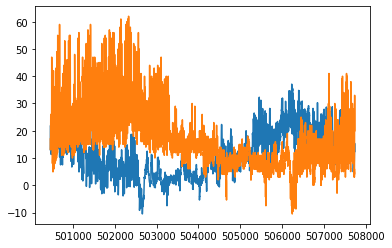

In [35]:
plt.plot(df_new["aussentemperatur"].loc[(df_new["container_id"]==2)])
plt.plot(df_new["temperatur_in_grad"].loc[(df_new["container_id"]==2)], al)
plt.show()